# Спринт 7: Машинное обучение

In [105]:
# база
import numpy as np
import pandas as pd

# подготовка данных
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# модели
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# метрики
from sklearn.metrics import classification_report, confusion_matrix

# визуализация
import matplotlib.pyplot as plt
import seaborn as sns

# гиперпараметры
from sklearn.model_selection import GridSearchCV

# нейронные сети
import tensorflow.keras as keras

# сериализация
import pickle

## Анализ данных

[Дефекты при изготовлении стальных пластин](http://archive.ics.uci.edu/ml/datasets/Steel+Plates+Faults) ([link2](https://github.com/makinarocks/awesome-industrial-machine-datasets/tree/master/data-explanation/Steel%20Plates%20Faults))

Набор данных о неисправностях стальных пластин, классифицированных на 7 различных типов.

Набор данных содержит 7 классов и 27 признаков, которые описывают неисправность: (местоположение, размер,...) и тип неисправности (один из 7: 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults')

### Загрузка данных

In [3]:
# ValueError: Specified \n as separator or delimiter. This forces the python engine which does not accept a line terminator. Hence it is not allowed to use the line terminator as separator.
cols = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/00198/Faults27x7_var', sep=' ', header=None)

In [4]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/00198/Faults.NNA', header=None, sep='\t')
df.columns = cols.values.flatten()
df

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,249,277,325780,325796,273,54,22,35033,119,141,...,-0.4286,0.0026,0.7254,0,0,0,0,0,0,1
1937,144,175,340581,340598,287,44,24,34599,112,133,...,-0.4516,-0.0582,0.8173,0,0,0,0,0,0,1
1938,145,174,386779,386794,292,40,22,37572,120,140,...,-0.4828,0.0052,0.7079,0,0,0,0,0,0,1
1939,137,170,422497,422528,419,97,47,52715,117,140,...,-0.0606,-0.0171,0.9919,0,0,0,0,0,0,1


In [35]:
categorical_features = ['TypeOfSteel_A300', 'TypeOfSteel_A400']
target = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']
numeric_features = df.columns.drop(categorical_features + target)

## Визуализация

In [24]:
sns.set_theme()

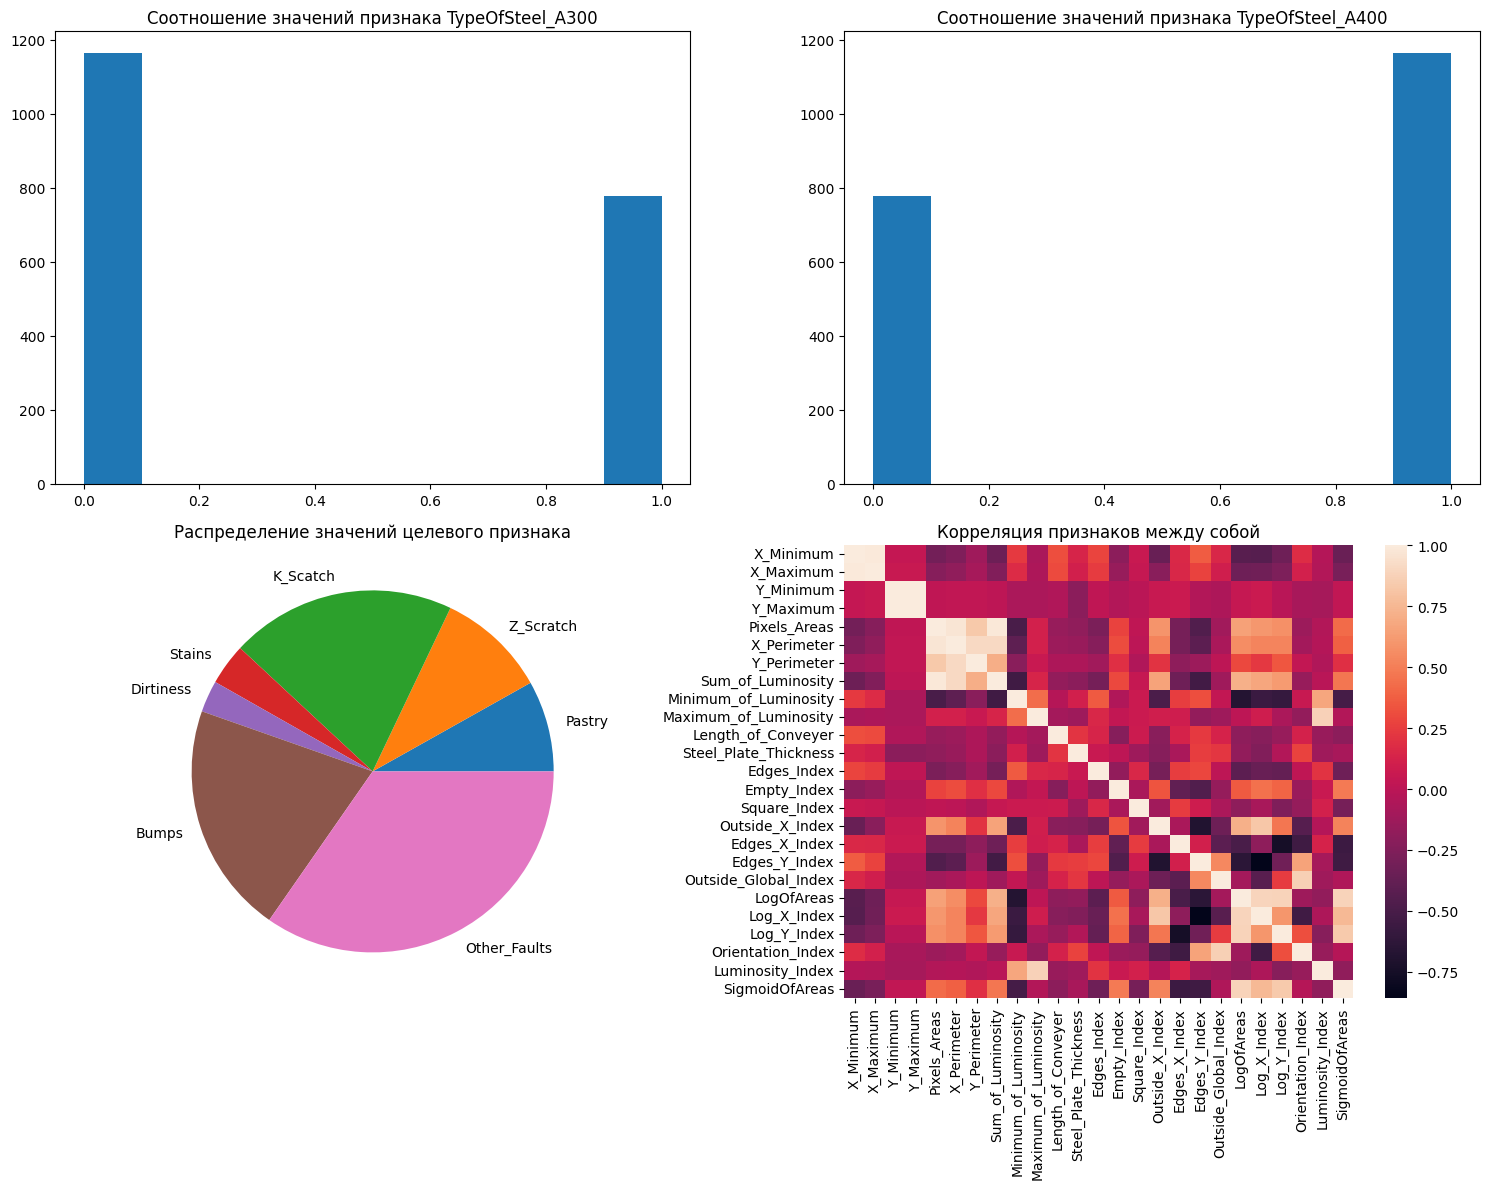

In [84]:
fig, ax = plt.subplots(2, 2, figsize=(15, 12))

labels, counts, labels_pie = [], [], []
for col in df[target].columns:
    cnt = df[col].sum()
    counts.append(cnt)
    labels.append(col)
    labels_pie.append(col + f' ({cnt})')

ax[0, 0].hist(df.TypeOfSteel_A300)
ax[0, 0].set_title('Соотношение значений признака TypeOfSteel_A300')

ax[0, 1].hist(df.TypeOfSteel_A400)
ax[0, 1].set_title('Соотношение значений признака TypeOfSteel_A400')

ax[1, 0].pie(counts, labels=labels)
ax[1, 0].set_title('Распределение значений целевого признака')


sns.heatmap(ax=ax[1, 1], data=df[numeric_features].corr())
ax[1, 1].set_title('Корреляция признаков между собой')

fig.tight_layout();

какие выводы можно сделать по визуализации?

- **Соотношение значений признаков TypeOfSteel_A300,  TypeOfSteel_A400.** Судя по графикам, значения этих признаков взаимоисключающие, и к ним уже было применено one-hot кодирование 

- **Распределение целевого признака.** Значения целевого признака распределены неравномерно, но в целом ситуация не самая печальная.

- **Корреляция.** У многих признаков наблюдается достаточно высокая (по модулю) корреляция между собой; это можно было бы использовать, удалив один из двух сильно коррелирующих признаков для ускорения обучения, однако в данном случае смысла в этом нет - данных очень мало.

### Предобработка данных

In [51]:
df.isnull().sum()

X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Pastry                   0
Z_Scratch                0
K_Scatch                 0
Stains                   0
Dirtiness                0
Bumps                    0
Other_Faults             0
dtype: int64

пустых значений в датасете нет

датасет подаётся с уже закодированным целевым признаком, единственный категориальный признак - TypeOfSteel - тоже уже закодирован. остаётся только обновить типы данных

In [52]:
df_for_model = df.copy()

In [53]:
for col in categorical_features + target:
    df_for_model[col] = df_for_model[col].astype(bool)

In [54]:
df_for_model.dtypes

X_Minimum                  int64
X_Maximum                  int64
Y_Minimum                  int64
Y_Maximum                  int64
Pixels_Areas               int64
X_Perimeter                int64
Y_Perimeter                int64
Sum_of_Luminosity          int64
Minimum_of_Luminosity      int64
Maximum_of_Luminosity      int64
Length_of_Conveyer         int64
TypeOfSteel_A300            bool
TypeOfSteel_A400            bool
Steel_Plate_Thickness      int64
Edges_Index              float64
Empty_Index              float64
Square_Index             float64
Outside_X_Index          float64
Edges_X_Index            float64
Edges_Y_Index            float64
Outside_Global_Index     float64
LogOfAreas               float64
Log_X_Index              float64
Log_Y_Index              float64
Orientation_Index        float64
Luminosity_Index         float64
SigmoidOfAreas           float64
Pastry                      bool
Z_Scratch                   bool
K_Scatch                    bool
Stains    

проведём проверку на принадлежность одного элемента датасета нескольким классам

In [56]:
assert sum(counts) == len(df)

ассерт прошёл успешно, значит, пересекающихся классов нет - и это отлично, будет проще решать задачу

разобьём данные на тестовые и тренировочные, соотношение оставим стандартное - 0.75 : 0.25

In [57]:
data_train, data_test, target_train, target_test = train_test_split(df_for_model.drop(target, axis=1), df_for_model[target])

## Создание моделей

### Дерево решений

              precision    recall  f1-score   support

      Pastry       0.53      0.55      0.54        33
   Z_Scratch       0.77      0.93      0.85        44
    K_Scatch       0.98      0.95      0.96        99
      Stains       0.94      0.89      0.91        18
   Dirtiness       0.77      0.95      0.85        21
       Bumps       0.59      0.63      0.61        94
Other_Faults       0.75      0.68      0.71       177

   micro avg       0.76      0.76      0.76       486
   macro avg       0.76      0.80      0.78       486
weighted avg       0.76      0.76      0.76       486
 samples avg       0.76      0.76      0.76       486



<Axes: >

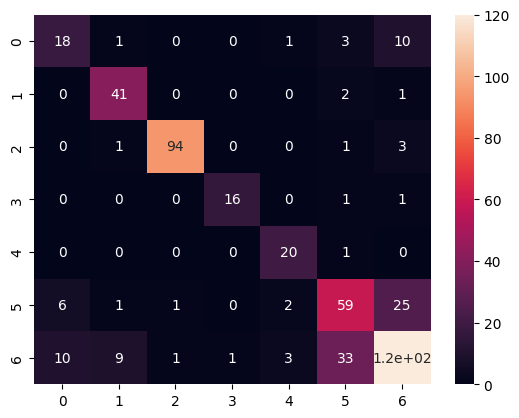

In [114]:
dtc = DecisionTreeClassifier()

dtc.fit(data_train, target_train)

pred = dtc.predict(data_test)

print(classification_report(target_test, pred, target_names=labels))
sns.heatmap(confusion_matrix(target_test.values.argmax(axis=1), pred.argmax(axis=1)), annot=True)

точность 76% - ни много, ни мало. классификатор делает довольно большие ошибки на классах 'Pastry', 'Bumps' и 'Other_Faults'

### Случайный лес

              precision    recall  f1-score   support

      Pastry       0.78      0.21      0.33        33
   Z_Scratch       0.90      0.84      0.87        44
    K_Scatch       1.00      0.90      0.95        99
      Stains       1.00      0.89      0.94        18
   Dirtiness       1.00      0.67      0.80        21
       Bumps       0.79      0.61      0.69        94
Other_Faults       0.84      0.67      0.74       177

   micro avg       0.88      0.70      0.78       486
   macro avg       0.90      0.68      0.76       486
weighted avg       0.88      0.70      0.77       486
 samples avg       0.70      0.70      0.70       486



/home/sega/projects/as-backend-course/Project/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

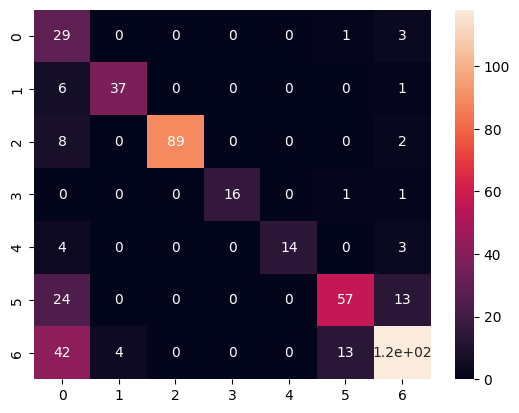

In [113]:
rfc = RandomForestClassifier()

rfc.fit(data_train, target_train)

pred = rfc.predict(data_test)

print(classification_report(target_test, pred, target_names=labels))
sns.heatmap(confusion_matrix(target_test.values.argmax(axis=1), pred.argmax(axis=1)), annot=True)

в среднем лучше, но страдает полнота для первого класса - я бы не стал использовать эту модель

### K ближайших соседей

              precision    recall  f1-score   support

      Pastry       1.00      0.03      0.06        33
   Z_Scratch       0.00      0.00      0.00        44
    K_Scatch       0.88      0.78      0.82        99
      Stains       0.00      0.00      0.00        18
   Dirtiness       0.80      0.38      0.52        21
       Bumps       0.38      0.26      0.30        94
Other_Faults       0.55      0.41      0.47       177

   micro avg       0.61      0.38      0.47       486
   macro avg       0.51      0.27      0.31       486
weighted avg       0.55      0.38      0.42       486
 samples avg       0.38      0.38      0.38       486



/home/sega/projects/as-backend-course/Project/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sega/projects/as-backend-course/Project/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

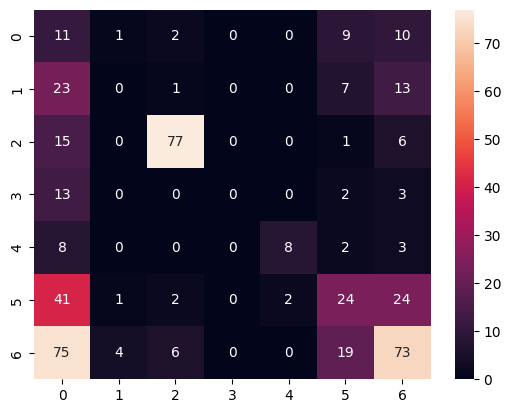

In [112]:
knn = KNeighborsClassifier()

knn.fit(data_train, target_train)

pred = knn.predict(data_test)

print(classification_report(target_test, pred, target_names=labels))
sns.heatmap(confusion_matrix(target_test.values.argmax(axis=1), pred.argmax(axis=1)), annot=True)

ну тут всё совсем плохо. возможно, проблема в данных - малочисленные классы не попали в обучающую выборку и моделям тяжело их распознавать

## Гиперпараметры

In [110]:
models = [
    {
        'name': 'Дерево принятия решений',
        'instance': DecisionTreeClassifier()
    },
    {
        'name': 'Случайный лес',
        'instance': RandomForestClassifier()
    },
    {
        'name': 'K ближайших соседей',
        'instance': KNeighborsClassifier()
    }
]

params= [
    {
        'max_features': [5, 10, 15, 20, 25, 30, 35, 40],
        'max_depth': [None, 1, 2, 3, 4,  5, 6,  7, 8, 9, 10, 11, 12, 13, 14, 15]
    },
    {
        'max_features': ['sqrt', 'log2', None, 5, 15, 25, 35, 45],
        'max_depth': [None, 2, 4, 6, 8, 10, 12, 14]
    },
    {
        'n_neighbors': [2, 5, 8, 10]
    }
]

In [115]:
best_score = None
for model, params_grid in zip(models, params):
    classifier = GridSearchCV(model['instance'], params_grid)
    classifier.fit(data_train, target_train)
    parameters = classifier.best_params_
    score = classifier.score(data_test, target_test)
    if best_score is None or score > best_score:
        best_score = score
        best_model = model
        best_params = parameters
    print(f'Модель         :>> {model["name"]}')
    print(f'Accuracy       :>> {score}')
    print(f'При параметрах :>> {parameters}')
    print('---')

print(f'Лучшая модель :>> {best_model["name"]}')
print(f'Accuracy      :>> {best_score}')
print(f'Параметры     :>> {best_params}')

Модель         :>> Дерево принятия решений
Accuracy       :>> 0.7304526748971193
При параметрах :>> {'max_depth': None, 'max_features': 15}
---
Модель         :>> Случайный лес
Accuracy       :>> 0.742798353909465
При параметрах :>> {'max_depth': None, 'max_features': 25}
---
Модель         :>> K ближайших соседей
Accuracy       :>> 0.3765432098765432
При параметрах :>> {'n_neighbors': 5}
---
Лучшая модель :>> Случайный лес
Accuracy      :>> 0.742798353909465
Параметры     :>> {'max_depth': None, 'max_features': 25}


довольно ожидаемый результат. случайный лес всё так же использовать не буду - отталкивает низкая полнота.

In [119]:
with open('../../models/best-classifier.model', 'wb') as file:
    pickle.dump(
        pickle.dumps(dtc), file
    )

In [120]:
with open('../../models/best-classifier.model', 'rb') as file:
    bs = pickle.load(file)

model = pickle.loads(bs)

In [121]:
model.score(data_test, target_test)

0.757201646090535

## Нейронные сети

In [140]:
keras.backend.clear_session()

nn = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(data_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(len(target), activation='softmax'),
])

nn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history = nn.fit(data_train.astype(np.float32), target_train, epochs=100)

Epoch 1/100
46/46 [==============================] - 2s 7ms/step - loss: 652.6786 - acc: 0.2701
Epoch 2/100
46/46 [==============================] - 0s 6ms/step - loss: 51.8386 - acc: 0.3395
Epoch 3/100
46/46 [==============================] - 0s 5ms/step - loss: 20.8011 - acc: 0.3313
Epoch 4/100
46/46 [==============================] - 0s 4ms/step - loss: 15.6226 - acc: 0.3443
Epoch 5/100
46/46 [==============================] - 0s 5ms/step - loss: 9.4370 - acc: 0.3491
Epoch 6/100
46/46 [==============================] - 0s 4ms/step - loss: 7.1500 - acc: 0.3347
Epoch 7/100
46/46 [==============================] - 0s 4ms/step - loss: 6.5653 - acc: 0.3684
Epoch 8/100
46/46 [==============================] - 0s 4ms/step - loss: 2.9494 - acc: 0.3876
Epoch 9/100
46/46 [==============================] - 0s 4ms/step - loss: 2.3706 - acc: 0.4186
Epoch 10/100
46/46 [==============================] - 0s 4ms/step - loss: 2.1090 - acc: 0.4234
Epoch 11/100
46/46 [==============================] - 

46/46 [==============================] - 0s 4ms/step - loss: 1.3563 - acc: 0.4893
Epoch 88/100
46/46 [==============================] - 0s 4ms/step - loss: 1.3540 - acc: 0.4928
Epoch 89/100
46/46 [==============================] - 0s 4ms/step - loss: 1.3492 - acc: 0.4928
Epoch 90/100
46/46 [==============================] - 0s 4ms/step - loss: 1.3740 - acc: 0.4845
Epoch 91/100
46/46 [==============================] - 0s 4ms/step - loss: 1.3722 - acc: 0.4866
Epoch 92/100
46/46 [==============================] - 0s 4ms/step - loss: 1.3437 - acc: 0.4887
Epoch 93/100
46/46 [==============================] - 0s 4ms/step - loss: 1.3912 - acc: 0.4784
Epoch 94/100
46/46 [==============================] - 0s 5ms/step - loss: 1.3507 - acc: 0.4838
Epoch 95/100
46/46 [==============================] - 0s 4ms/step - loss: 1.3477 - acc: 0.4935
Epoch 96/100
46/46 [==============================] - 0s 4ms/step - loss: 1.3393 - acc: 0.4969
Epoch 97/100
46/46 [==============================] - 0s 4ms/st

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.00      0.00      0.00        44
           2       0.88      0.78      0.82        99
           3       0.00      0.00      0.00        18
           4       0.00      0.00      0.00        21
           5       0.36      0.53      0.43        94
           6       0.50      0.72      0.59       177

   micro avg       0.52      0.52      0.52       486
   macro avg       0.25      0.29      0.26       486
weighted avg       0.43      0.52      0.46       486
 samples avg       0.52      0.52      0.52       486



/home/sega/projects/as-backend-course/Project/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

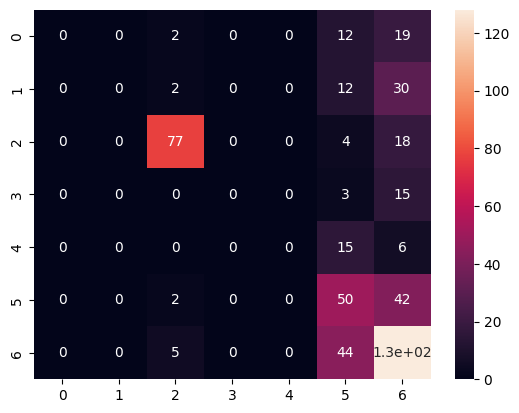

In [185]:
nn_pred = nn.predict(data_test.astype(np.float32), verbose=False)

pred = []
for row in nn_pred:
    pred.append(np.where(row == row.max(), 1, 0))

pred = np.array(pred)
print(classification_report(target_test, pred))
sns.heatmap(confusion_matrix(target_test.values.argmax(axis=1), pred.argmax(axis=1)), annot=True)

больше половины классов нейросеть не обнаружила

Text(0.5, 1.0, 'Зависимость точности от эпохи')

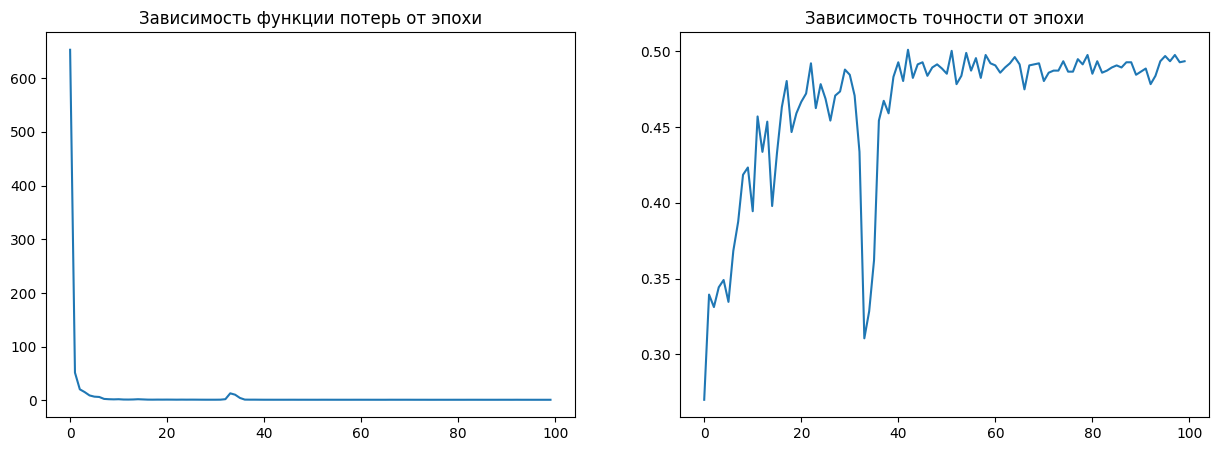

In [193]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].plot(np.array(history.history['loss']))
ax[0].set_title('Зависимость функции потерь от эпохи')

ax[1].plot(np.array(history.history['acc']))
ax[1].set_title('Зависимость точности от эпохи')

## Дополнительно: XGBoost

              precision    recall  f1-score   support

           0       0.54      0.39      0.46        33
           1       0.93      0.93      0.93        44
           2       0.99      0.96      0.97        99
           3       1.00      0.89      0.94        18
           4       0.95      0.86      0.90        21
           5       0.77      0.66      0.71        94
           6       0.79      0.81      0.80       177

   micro avg       0.84      0.80      0.82       486
   macro avg       0.85      0.79      0.82       486
weighted avg       0.84      0.80      0.82       486
 samples avg       0.78      0.80      0.78       486



/home/sega/projects/as-backend-course/Project/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

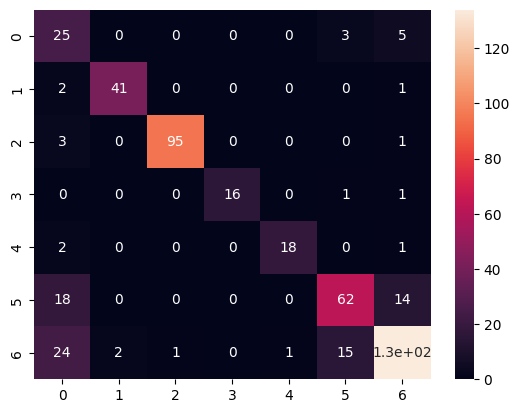

In [194]:
import xgboost as xgb

xgb_regressor = xgb.XGBClassifier()
xgb_regressor.fit(data_train.to_numpy(), target_train.to_numpy())
xgb_pred = xgb_regressor.predict(data_test.to_numpy())

print(classification_report(target_test, xgb_pred))
sns.heatmap(confusion_matrix(target_test.values.argmax(axis=1), xgb_pred.argmax(axis=1)), annot=True)

а вот это уже интересный результат - полнота у некоторых классов всё ещё низкая, но сильно повысилась точность

## Дополнительно: CatBoost

In [203]:
target_train.to_numpy().argmax(axis=1)

array([6, 1, 5, ..., 6, 6, 2])

              precision    recall  f1-score   support

           0       0.55      0.52      0.53        33
           1       0.91      0.93      0.92        44
           2       1.00      0.94      0.97        99
           3       1.00      0.89      0.94        18
           4       0.94      0.76      0.84        21
           5       0.72      0.73      0.73        94
           6       0.76      0.81      0.78       177

   micro avg       0.81      0.81      0.81       486
   macro avg       0.84      0.80      0.82       486
weighted avg       0.82      0.81      0.81       486
 samples avg       0.81      0.81      0.81       486



<Axes: >

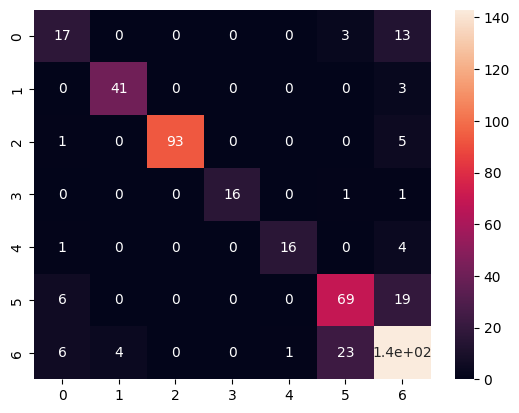

In [208]:
import catboost as cb

cbc = cb.CatBoostClassifier()
cbc.fit(data_train.to_numpy(), target_train.to_numpy().argmax(axis=1), verbose=False)
cbc_pred = cbr.predict(data_test.to_numpy())

print(classification_report(target_test, keras.utils.to_categorical(cbc_pred.flatten())))
sns.heatmap(confusion_matrix(target_test.values.argmax(axis=1), cbc_pred.flatten()), annot=True)

стало ещё лучше - повысилась полнота для первого класса. считаю эту модель самой удачной

In [209]:
with open('../../models/best-classifier.model', 'wb') as file:
    pickle.dump(
        pickle.dumps(cbc), file
    )

## Дополнительно: KNN

In [242]:
class KNN:
    def __init__(self, k_neighbors=5):
        self.k_neighbors = k_neighbors
    
    def fit(self, data_, target_):
        self.data = np.array(data_)
        self.target = np.array(target_)
    
    def predict(self, data_):
        data = np.array(data_)
        targets = []
        res = []
        for row in data:
            neighbors = self.__nearest_neighbors(row)
            for n in neighbors:
                targets.append(n[1].tolist())
            predict = max(targets, key=targets.count)
            res.append(predict)
        return np.array(res).astype(np.float32)
    
    def __distance(self, p1, p2) -> float:
        return np.sqrt(sum((p1 - p2) ** 2))
    
    def __nearest_neighbors(self, p) -> list[list[float], list[int]]:
        distances = []
        for d_row, t_row in zip(self.data, self.target):
            distances.append((d_row, t_row, self.__distance(p, d_row)))
        distances.sort(key=lambda x: x[2])
            
        return distances[:self.k_neighbors] if len(distances) > self.k_neighbors else distances

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.00      0.00      0.00        44
           2       0.60      0.06      0.11        99
           3       0.00      0.00      0.00        18
           4       0.00      0.00      0.00        21
           5       0.00      0.00      0.00        94
           6       0.36      0.98      0.53       177

   micro avg       0.37      0.37      0.37       486
   macro avg       0.14      0.15      0.09       486
weighted avg       0.26      0.37      0.22       486
 samples avg       0.37      0.37      0.37       486



/home/sega/projects/as-backend-course/Project/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

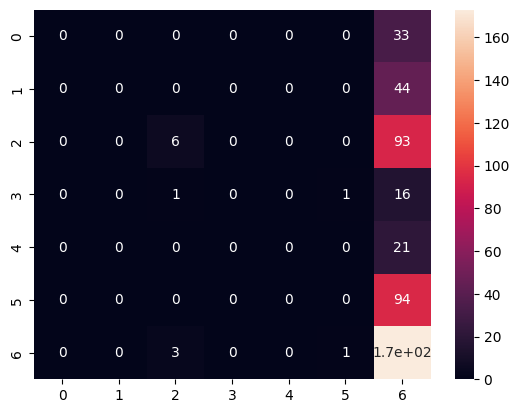

In [243]:
test = KNN()
test.fit(data_train, target_train)
pred = test.predict(data_test)

print(classification_report(target_test, pred))
sns.heatmap(confusion_matrix(target_test.values.argmax(axis=1), pred.argmax(axis=1)), annot=True)

из-за дизбаланса классов модель закидывает большинство записей в самый многочисленный класс (поскольку в модели приоритет отдаётся сначала по расстоянию, потом - по численности данного класса среди соседей). по крайней мере, мне хочется в это верить

Text(0.5, 1.0, 'Распределение классов в тестовой выборке')

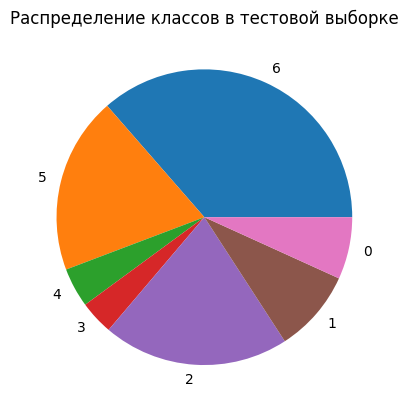

In [268]:
label, counts = np.unique(target_test, return_counts=True, axis=0)
plt.pie(counts, labels=[np.argmax(elem) for elem in label]);
plt.title('Распределение классов в тестовой выборке')